<a href="https://colab.research.google.com/github/bhargav23/AI/blob/master/Lab/EXP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3) Data visualization
* Data visualization allows us to quickly interpret the data and adjust different variables to see their effect
* Why visualize data?
  * Observe the patterns
  * Identify extreme values that could be anomalies
  * Easy interpretation
* We will learn how to create basic plots using matplotlib library
  * Scatter plot
  * Histogram
  * Bar plot







### Matplotlib
* Matplotlib is a 2 D plotting library which produces good quality figures
* Although it has its origins in emulating the MATLAB graphics commands, it is independent of MATLAB
* It makes heavy use of NumPy and other extension code to provide good performance even for large arrays

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/bhargav23/Dataset/master/Toyota.csv',index_col=0,na_values=['??','????'])

In [3]:
df.dropna(axis=0,inplace=True)

In [4]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170
5,12950,32.0,61000.0,Diesel,90.0,0.0,0,2000,3,1170


* The price of the car decreases as age of the car increases

### a) Line Graphs

In [5]:
df['Doors'].replace('three','3',inplace=True)
df['Doors'].replace('four','4',inplace=True)
df['Doors'].replace('five','5',inplace=True)

In [6]:
np.unique(df['Doors'])

array(['2', '3', '4', '5'], dtype=object)

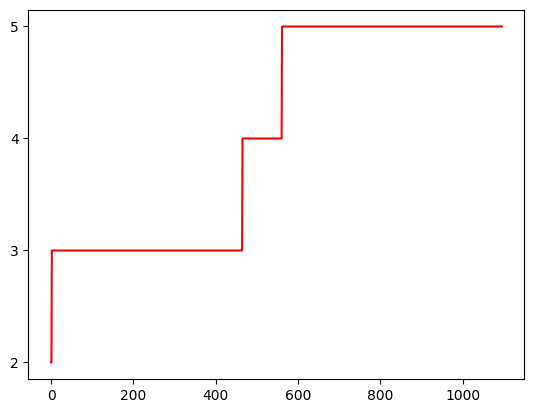

In [7]:
ypoints = np.array(df['Doors'].sort_values())

plt.plot(ypoints, color = 'r')
plt.show()

### b) Scatter Plot
* What is a scatter plot?
	* A scatter plot is a set of points that represents the values obtained for two different variables plotted on a horizontal and vertical axes
* When to use scatter plots?
 * Scatter plots are used to convey the relationship between two numerical variables
 * Scatter plots are sometimes called correlation plots because they show how two variables are correlated

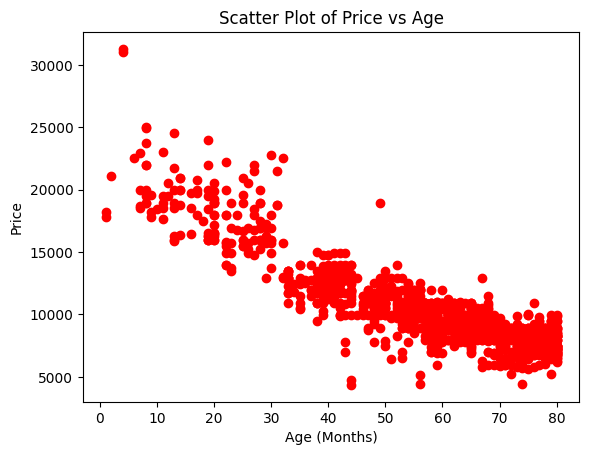

In [8]:
plt.scatter(df['Age'],df['Price'],c='Red')
plt.title("Scatter Plot of Price vs Age")
plt.xlabel("Age (Months)")
plt.ylabel("Price")
plt.show()

### c) Histogram
* What is a histogram?
 * It is a graphical representation of data using bars of different heights
 * Histogram groups numbers into ranges and the height of each bar depicts the frequency of each range or bin
* When to use histograms?
 * To represent the frequency distribution of numerical variables

(array([ 92., 239., 331., 222., 111.,  51.,  25.,  13.,  10.,   2.]),
 array([1.000000e+00, 2.430090e+04, 4.860080e+04, 7.290070e+04,
        9.720060e+04, 1.215005e+05, 1.458004e+05, 1.701003e+05,
        1.944002e+05, 2.187001e+05, 2.430000e+05]),
 <BarContainer object of 10 artists>)

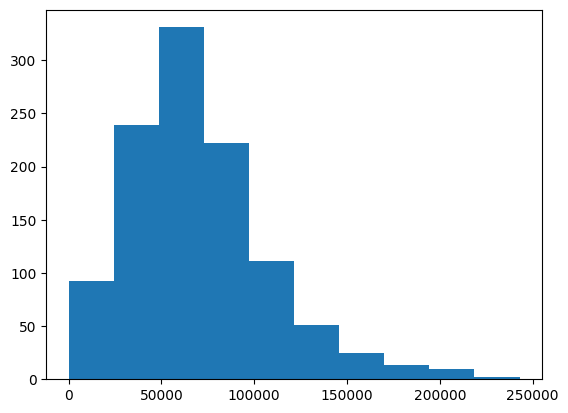

In [9]:
plt.hist(df['KM']) # Histogram with default arguments

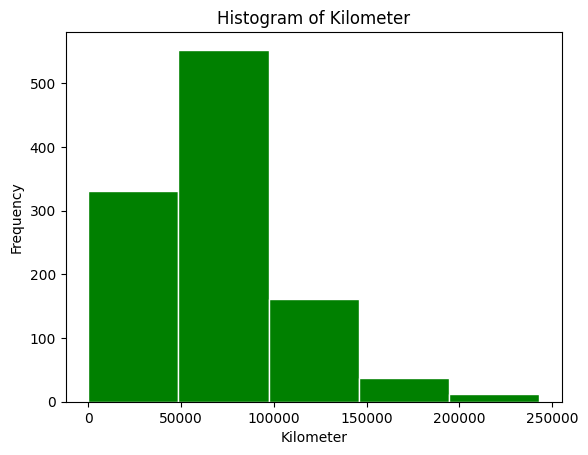

In [10]:
plt.hist(df['KM'], color = 'green', edgecolor = 'white', bins = 5)
plt.title('Histogram of Kilometer')
plt.xlabel('Kilometer')
plt.ylabel('Frequency')
plt.show()

* Frequency distribution of kilometre of the cars shows that most of the cars have travelled between 50000 100000 km and there are only few cars with more distance travelled

### d) Bar plot
* What is a bar plot?
 * A bar plot is a plot that presents categorical data with rectangular bars with lengths proportional to the counts that they represent
* When to use bar plot?
 * To represent the frequency distribution of categorical variables
 * A bar diagram makes it easy to compare sets of data between different groups

* Frequency distribution of fuel type

In [11]:
c = pd.crosstab(index=df['FuelType'],columns='count')
count = dict(c['count'])
fuelType = count.keys()
counts = count.values()
index = np.arange(len(fuelType))

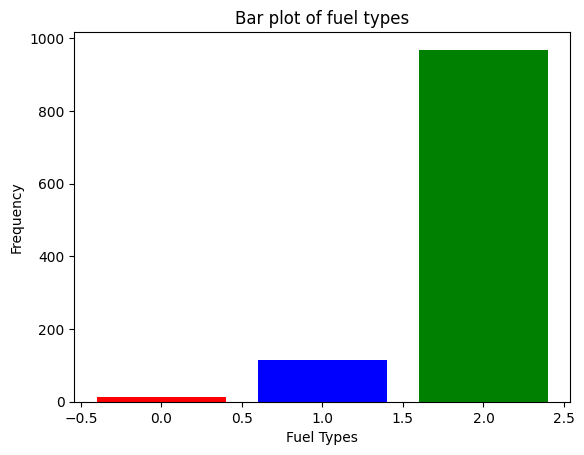

In [12]:
plt.bar(index, counts, color=['red', 'blue', 'green'])
plt.title('Bar plot of fuel types')
plt.xlabel('Fuel Types')
plt.ylabel('Frequency')
plt.show()


* Bar plot of fuel type shows that most of the cars have petrol as
fuel type

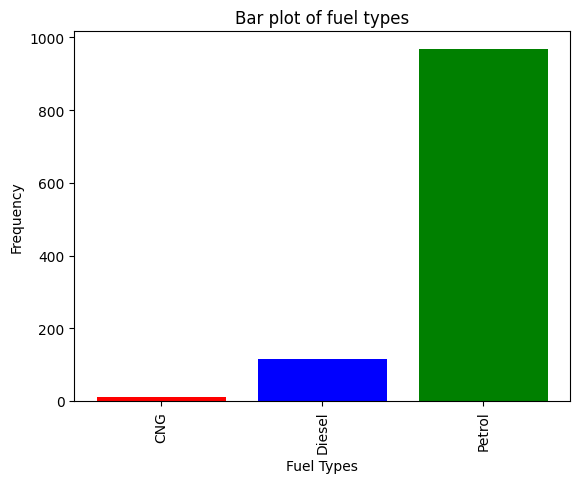

In [13]:
plt.bar(index, counts, color=['red', 'blue', 'green'])
plt.title('Bar plot of fuel types')
plt.xlabel('Fuel Types')
plt.ylabel('Frequency')
plt.xticks(index,fuelType,rotation=90)
plt.show()


### Seaborn
* Seaborn is a Python data visualization library based on matplotlib
* It provides a high level interface for drawing attractive and informative statistical graphics


In [14]:
import seaborn as sns

### e) Box and whiskers plot - numerical variable
* A box and whisker plot—also called a box plot—displays the five-number summary of a set of data.
* The five-number summary is the minimum, first quartile, median, third quartile, and maximum.
* Box and whiskers plot of **Price** to visually interpret the five number summary

<Axes: >

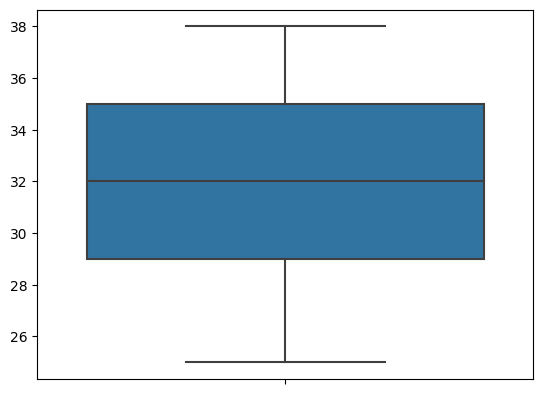

In [15]:
sns.boxplot(y=[25, 28, 29, 29, 30, 34, 35, 35, 37, 38])
 # minimum = 25, first quartile, median = (30 + 34) /2, third quartile, and maximum = 38
 # first quartile = 25, 28, 29, 29, 30 -- median = 29
 # third quartile = 34, 35, 35, 37, 38 -- median = 35

<Axes: ylabel='Price'>

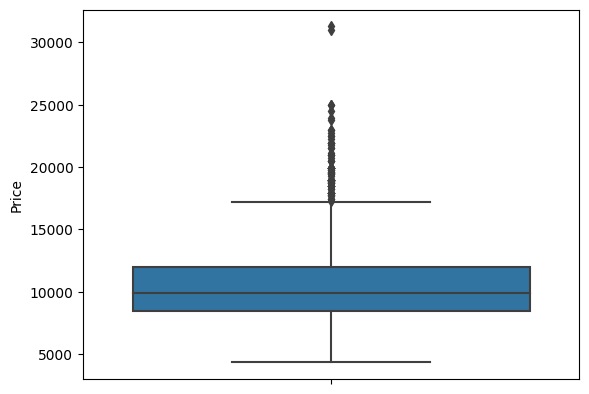

In [16]:
sns.boxplot(y=df['Price'])

### f) Pairwise plots

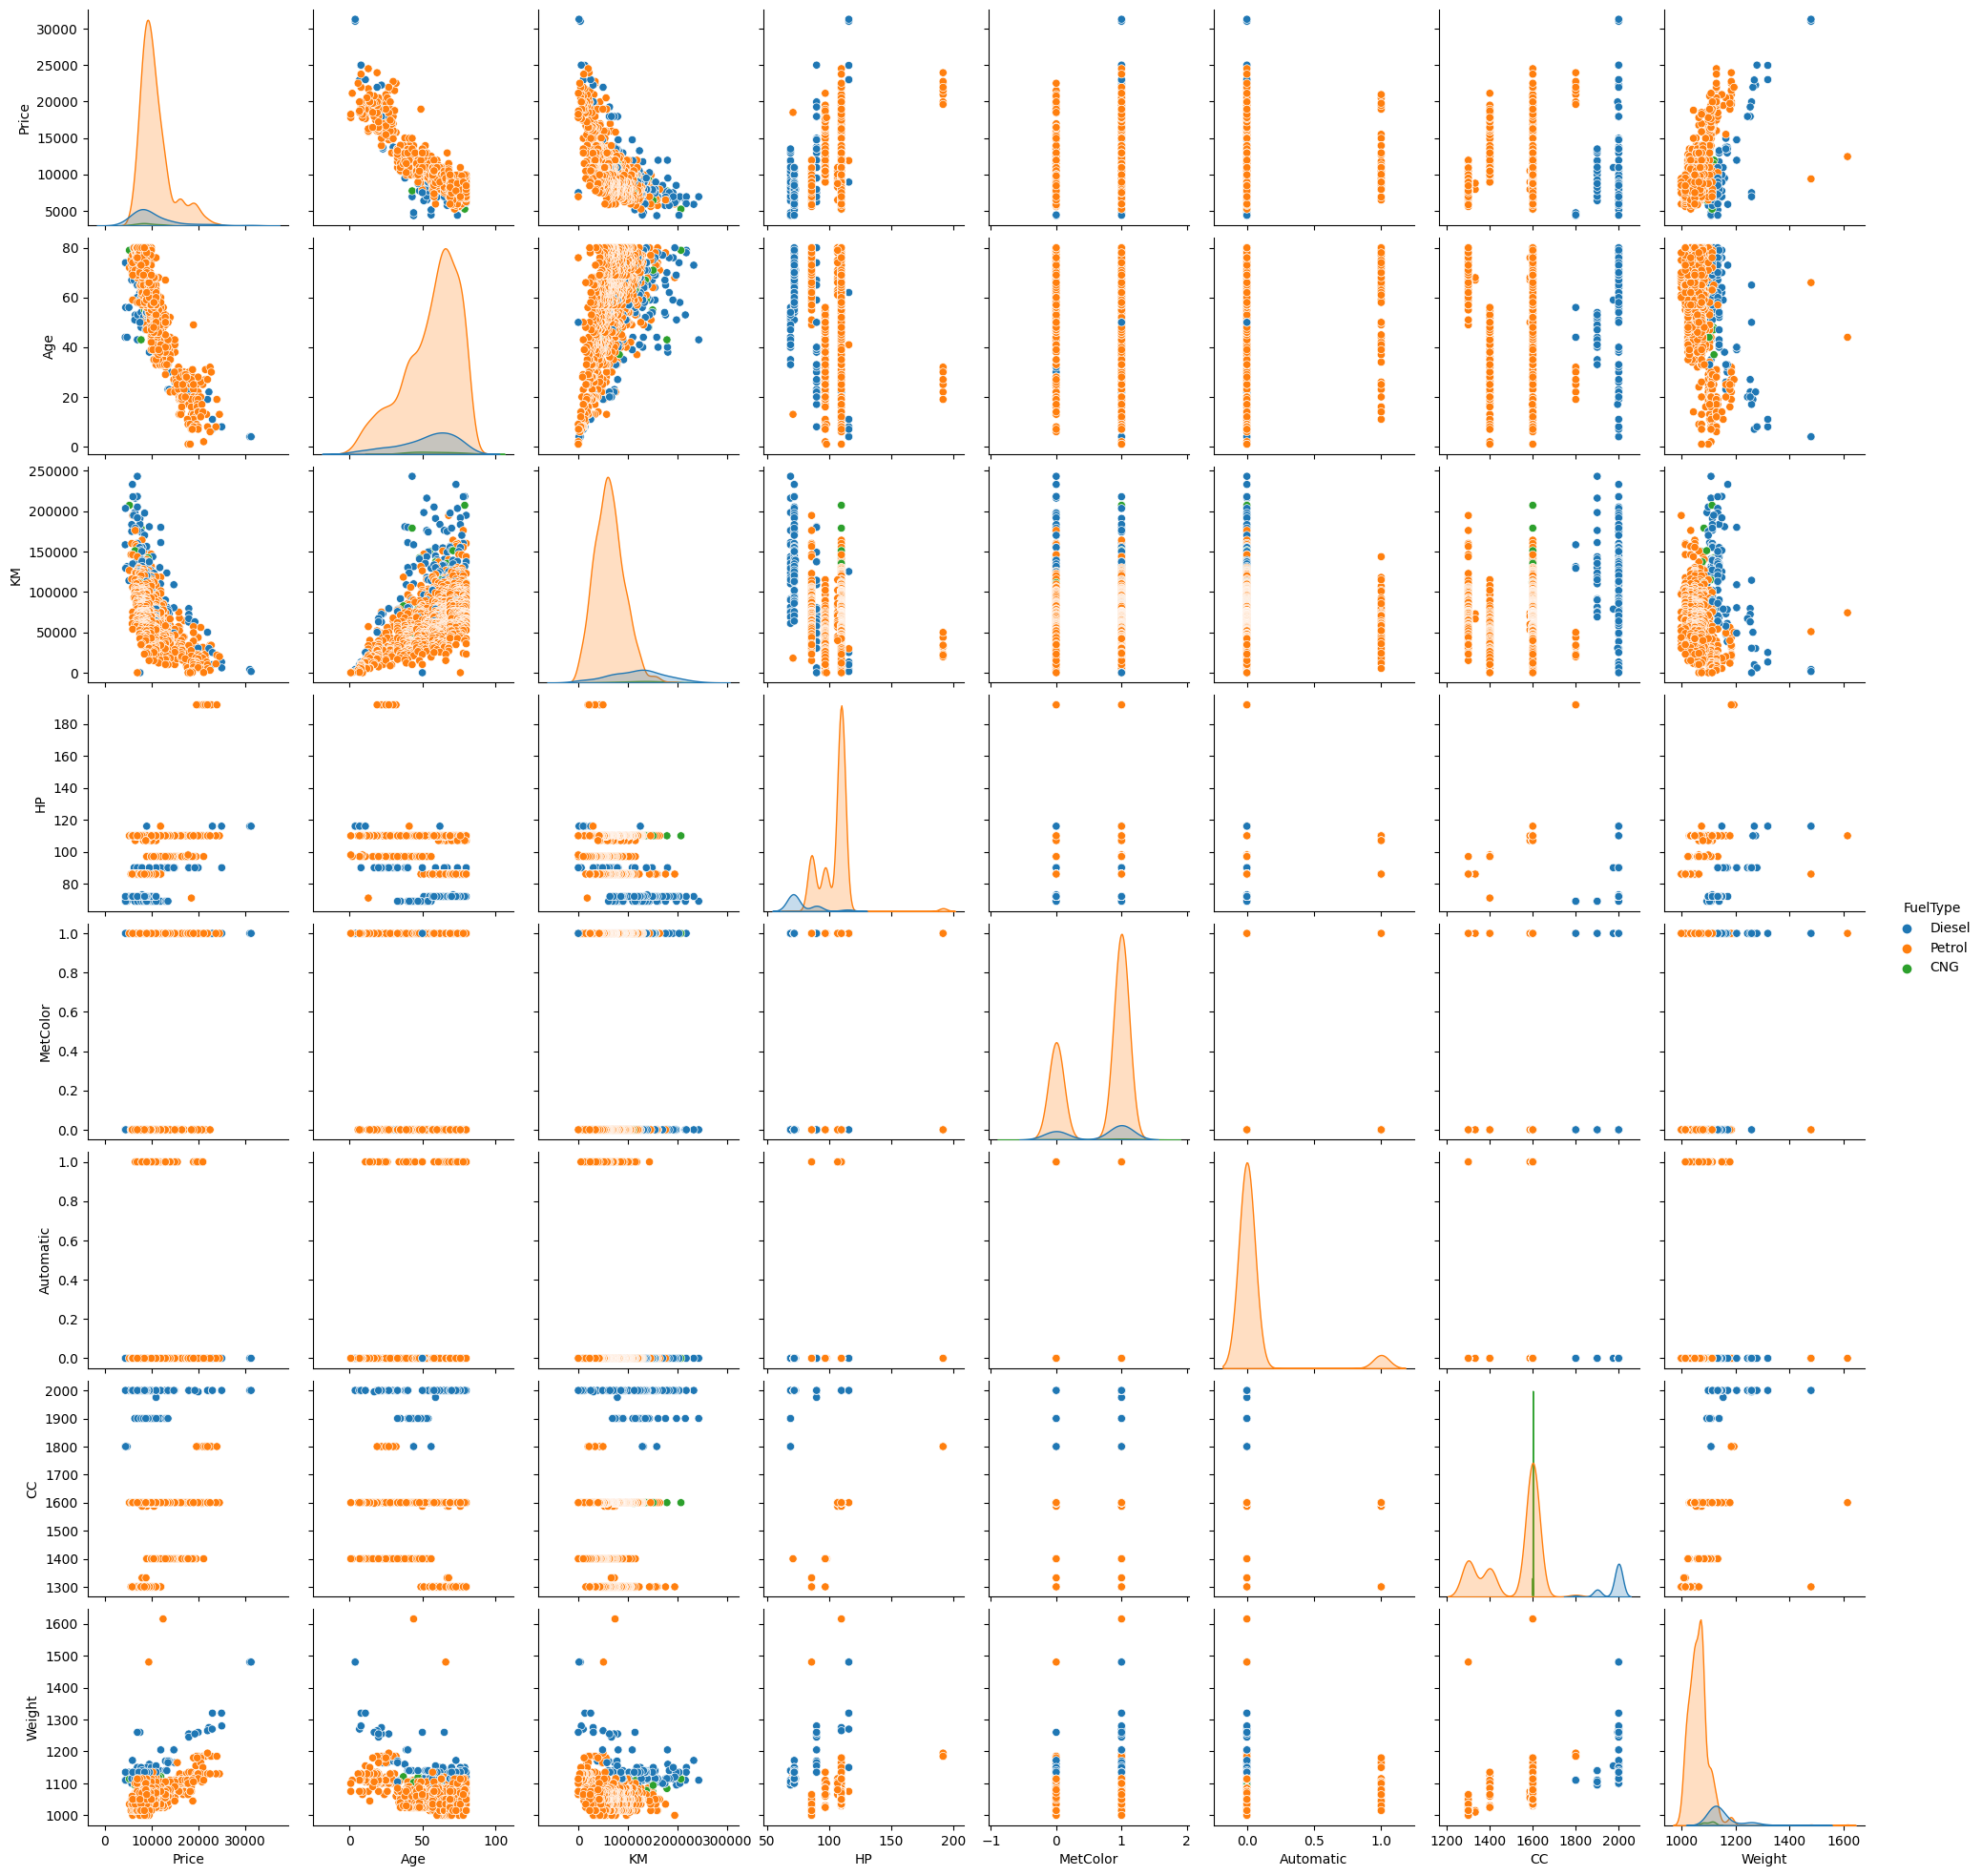

In [17]:
sns.pairplot(df , kind="scatter", hue = 'FuelType')
plt.show()

### g) Heatmap

In [18]:
df['Doors'] = df['Doors'].astype(int)
df['Age'] = df['Age'].astype(int)
df['HP'] = df['HP'].astype(int)
df['MetColor'] = df['MetColor'].astype(int)

In [19]:
df1=df.select_dtypes(exclude='object')

<Axes: >

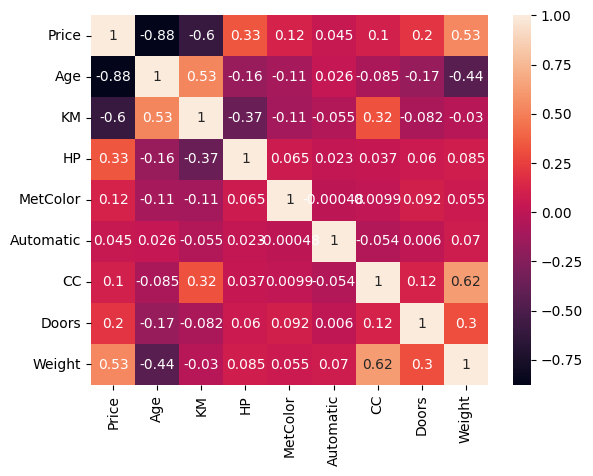

In [20]:
sns.heatmap(df1.corr(), annot=True)